# ***Clustering Assignment*** - *By Devendra Kumar*

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Loading the pandas and numpy libraries 

import numpy as np
import pandas as pd

## 1. **Data Understanding, Preparation & EDA**

### 1.1 **Data Understanding**

*Note - Please change the input file path according to your system before loading the file in df.*

In [2]:
# Loading data in to dataframe
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Analysing the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


***Observation*** <br>- *Here we see, the dataframe has total of `167 rows` which is quite small. <br> - Dataframe has total of `10 columns` and none of them has null values. <br> - There is just one column is of object type i.e country and rest are numeric/continous columns. <br> - We will remove `country` column from our dataframe as we have to cluster countries on basis of `gdp,child_mort,income`*

In [4]:
# Analysing some metrics 

df.describe(percentiles=[.25,.75,.9,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


***Observation*** <br> - *Added percentiles of 95%-99% to detect the outlier values in the columns.<br> - Just note the `90, 95 and 99 percentiles` and `max value` carefully, you will get idea about outliers. For example - In `gdpp`, values in `90%` to `95%` looks uniform but values in `99%` and `max value` getting significatlly high.<br> - In `exports`, `import`, `income`, `gdpp` columns is see a significant hike (almost doubule) of values between 95% to 99% of percentile. Here are some possiblities of having outliers in these columns.*

### 1.2 **EDA or Data Visualization**

In [5]:
# Importing viz libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid",font_scale=1)

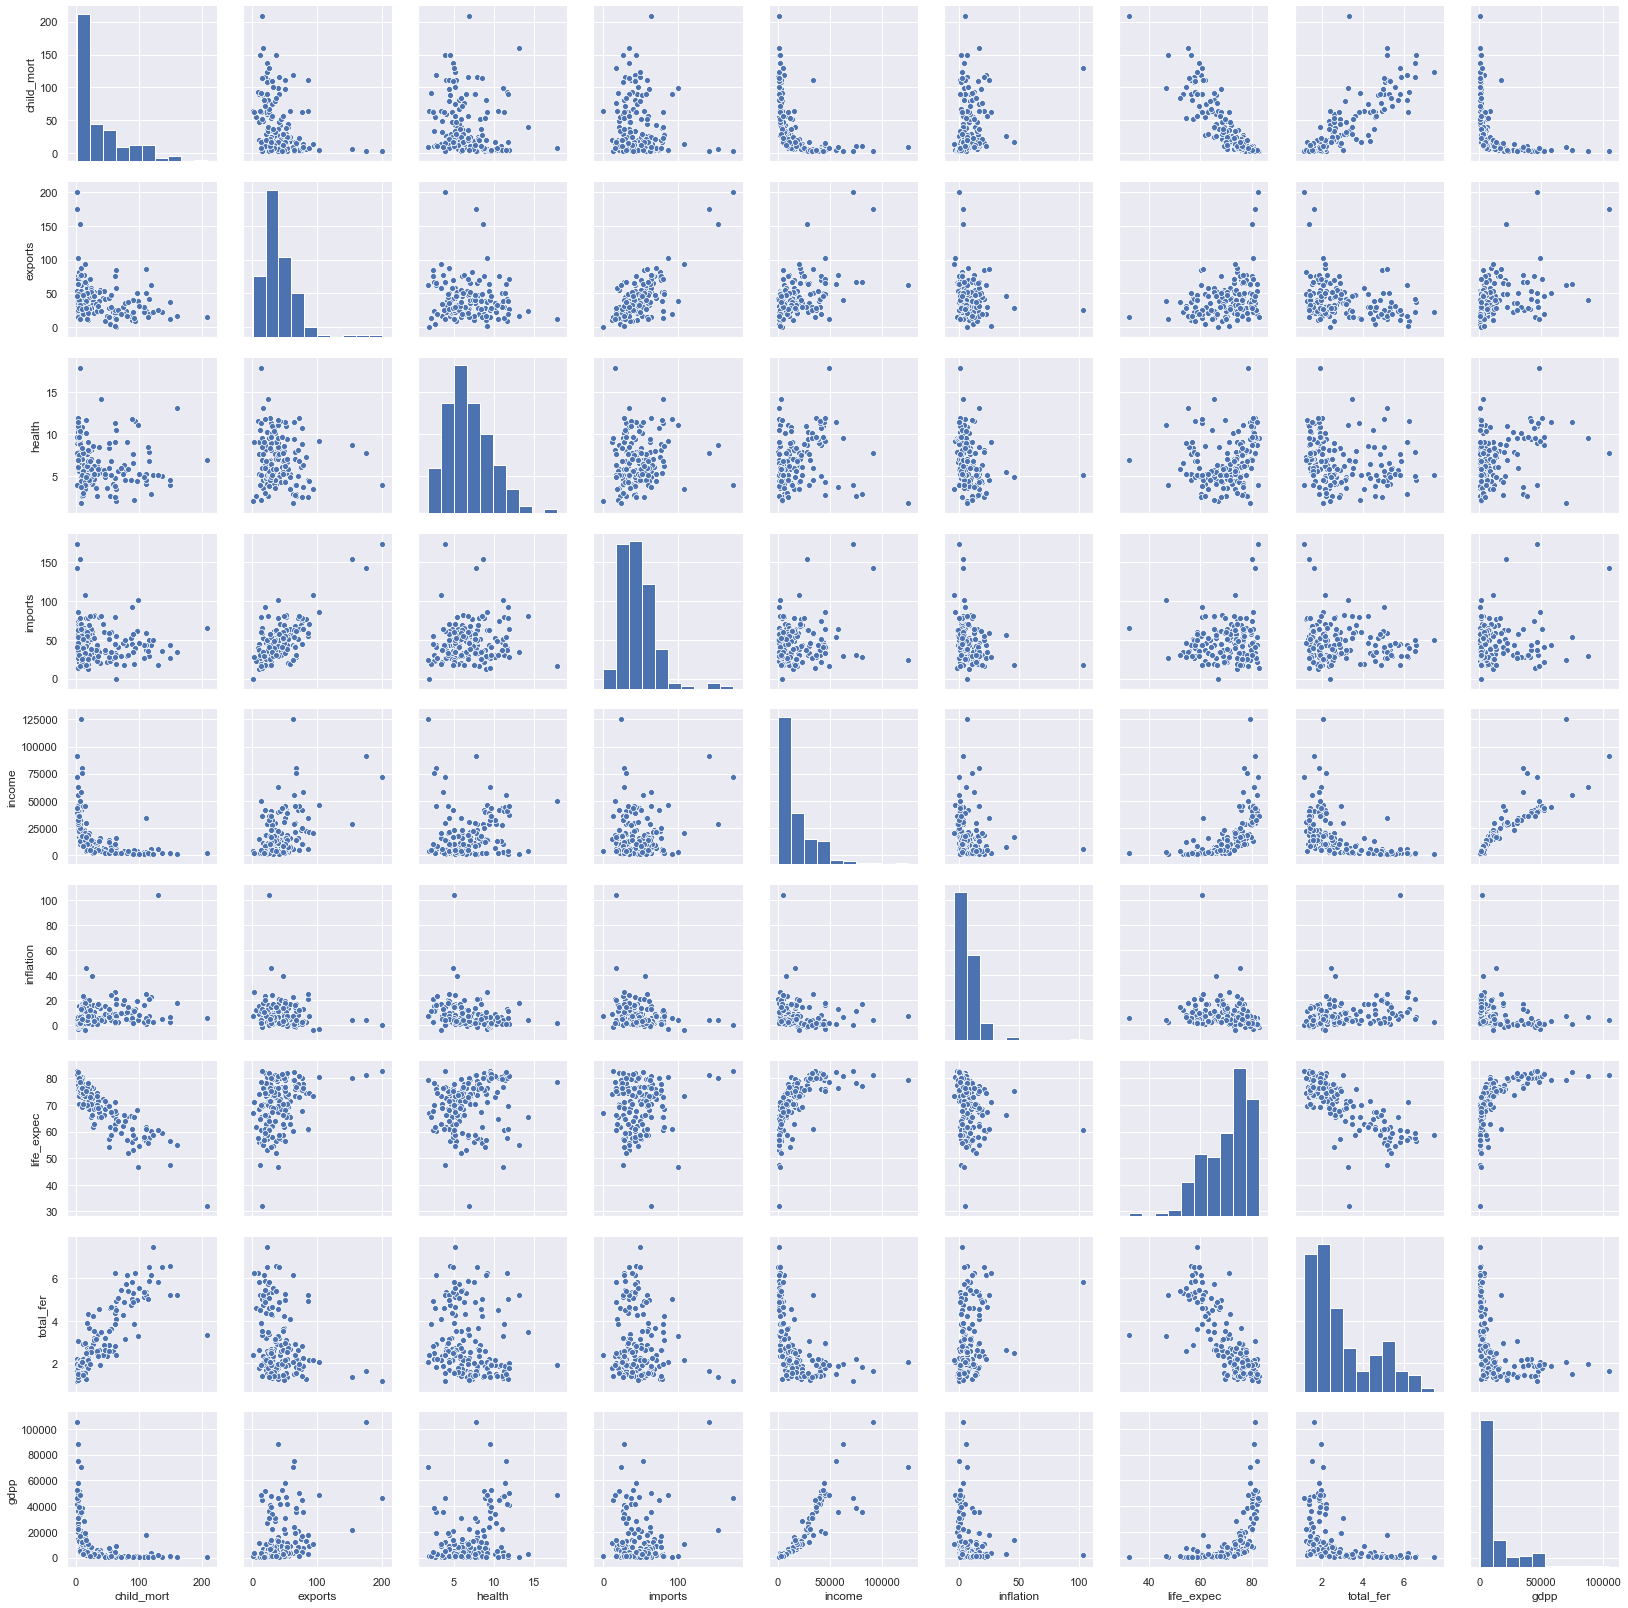

In [6]:
sns.pairplot(df)

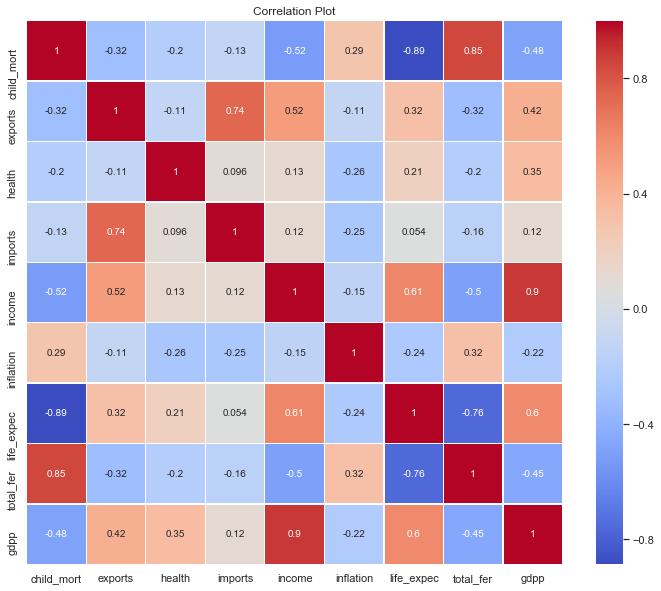

In [7]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot')
plt.show()

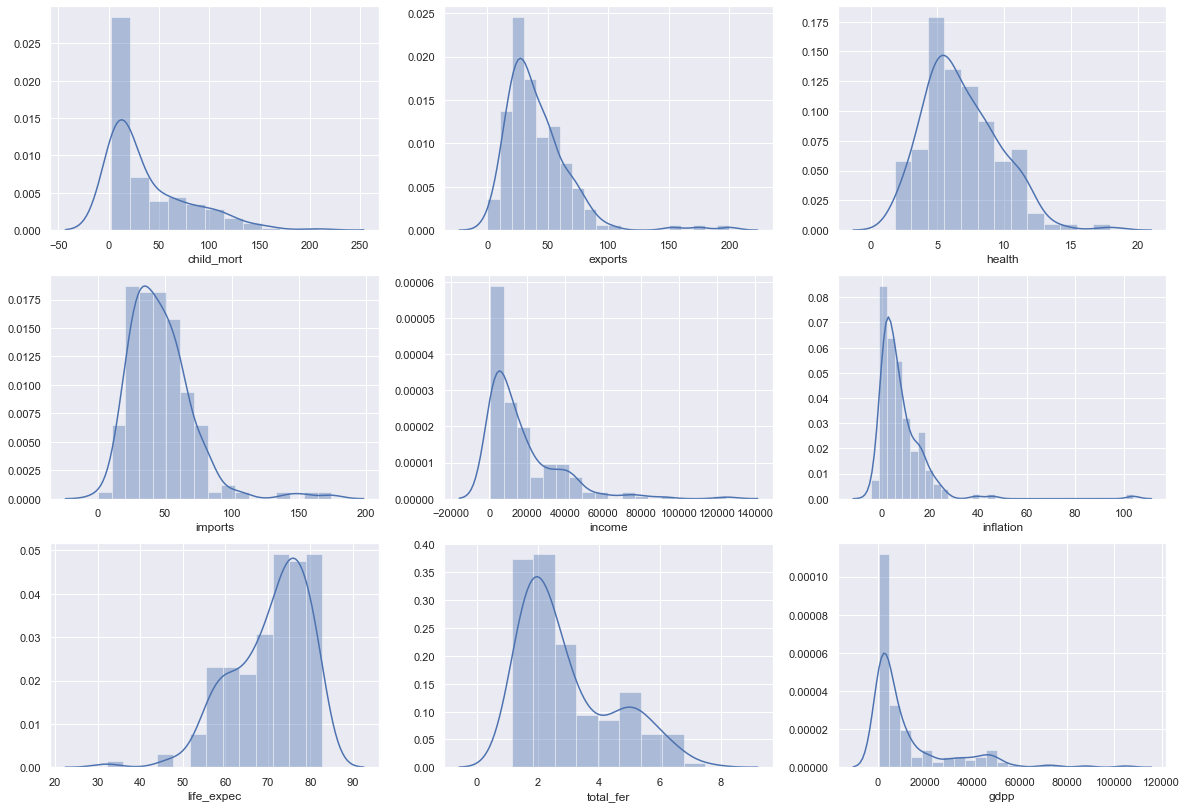

In [8]:
# Plotting distplot to check the variance of continous columns 

features = df.columns[1:]
plt.figure(figsize = (20,14))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

***Observations*** <br> - *`gdpp` : Here we see that the graph is on its peak on values between range `0-5000` and then its getting decerised very significantly. Hence, we can understand that the maximum of the countries in this dataset has `low gdpp`. <br> - `child_mort` : Here we see, that the graph on its peak on low values of `child_mort`, Hence, we can interpret that the maximum countries has `low child_mort` <br> - `income` : Just like child_mort and gdpp, maximum countries has low income values*

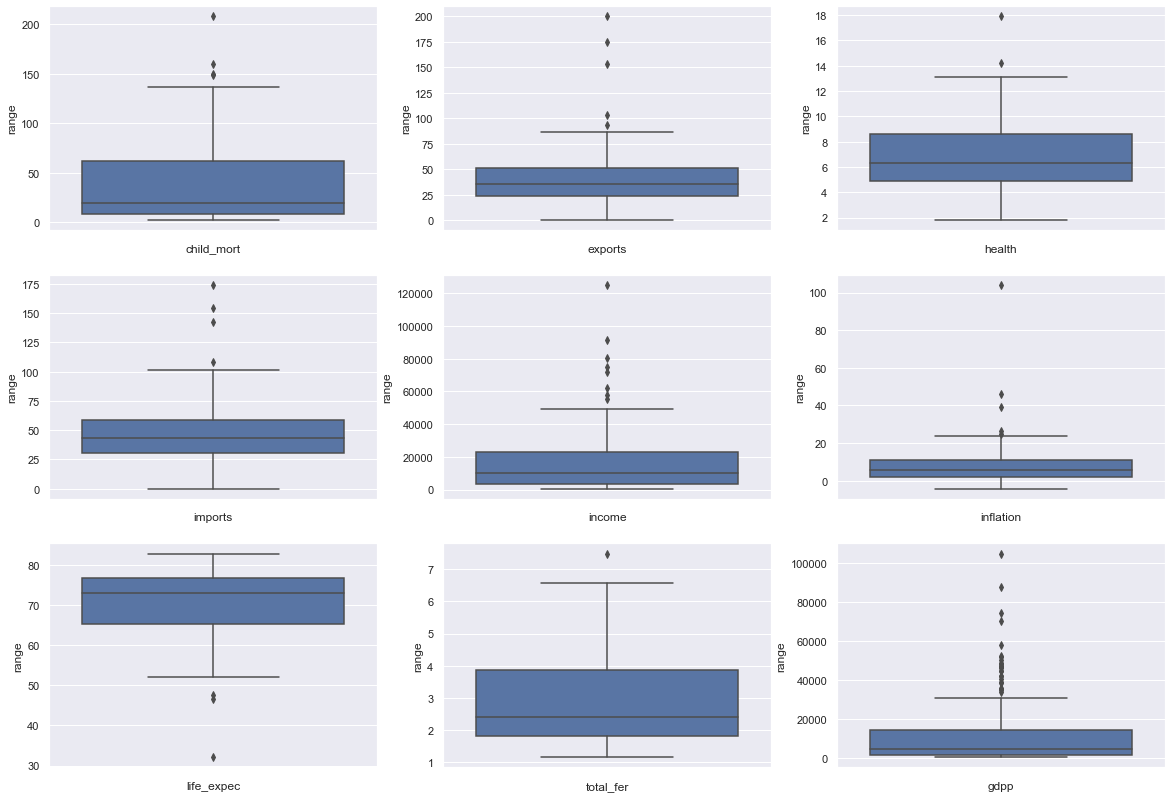

In [9]:
#  Plotting boxplot to observe outliers

plt.figure(figsize=(20,14))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]],orient='v')
    plt.xlabel(i[1])
    plt.ylabel('range')

***Observations*** <br> *- `child_mort` : After seeing the boxplot of `child_mort` we can simply understand that we are having some outliers at `upper quantile`*, ***which can make sense because there are some countries which has extermly low `child_mort` and are maybe in serious need of the donation, Hence, we will keep these outlier values and will not remove it.*** *However we don't have the outliers in the `lower quantile` But suppose if we had it, we could have remove `lower quantiles outliers` becasue it will not impact our analysis as Sumit also suggested in live clustering session.<br><br> - `gdpp` : As we see `gdpp` boxplot, we understand that there are so many outliers in its `upper quantile` so we can do outlier treatment for these outliers as higher gdpp countries doesn't need the donation.<br><br> - `income` : As we can see `income` also has outliers in `upper quantile`, Hence need outlier treatment.*

### 1.3 **Data Preparation**

In [10]:
## Duplicate rows check
df.duplicated().any()

False

*As given in data dictonary, `exports, imports and health` are the % values of `gdpp` so we will convert them into their orignal values*

In [11]:
# converting columns from their % values to their absolute value.

df['exports'] = df['exports'] * (df['gdpp']/100)
df['imports'] = df['imports'] * (df['gdpp']/100)
df['health'] = df['health'] * (df['gdpp']/100)

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### **Outliers Treatment :- Capping Outliers**

**Why Capping Outliers?** *As we has very small dataset of 167 rows,* ***removing outliers is not recommmeded***. *Becasue if we remove the outliers Firstly, we will loose more rows in the dataset and Secondly, we will loose information from upper and lower quantiles from few sensitive columns like `child_mort` which will impact our analysis to find the countries which are in serious need of the Donation. Hence, we are capping the outliers.*<br><br>**How Capping Outliers?** *Capping is somewhat type of `statical` process to remove outliers. In this what we will do is we will move the upper and lower outliers in `Q4` and `Q1` respectivly. If values are higher than its `Q4` value, then it is considered as outlier and will move those outliers to `Q4` range, and same with the lower outliers, if we have outliers below than `Q1` value then we will move those outliers in `Q1` range.<br>* ***Here, our `Q1` is `.01` and `Q4` is `.99`***

In [13]:
# Checking the matrix of .01,.25,.75,.9,.95 and .99 percentiles

df.describe(percentiles=[.01,.25,.75,.9,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


***Note*** <br> *- Here we are capping only `lower outliers` in `child_mort` because we need upper outliers for our analysis.<br> - For rest of the columns we are capping `upper outlier`.<br> - we are not doing outlier treatment for `inflation, life_expec and total_fer` columns because from above matrics I don't see any significant difference in `.9,.95,.99 and max` values. I see the difference is unifrom.*

In [14]:
# Capping child_mort
q1_child_mort = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort'] <= q1_child_mort] = q1_child_mort

In [15]:
# Capping exports
q4_exports = df['exports'].quantile(0.99)
df['exports'][df['exports'] >= q4_exports] = q4_exports

In [16]:
# Capping health
q4_health = df['health'].quantile(0.99)
df['health'][df['health'] >= q4_health] = q4_health

In [17]:
# Capping imports
q4_imports = df['imports'].quantile(0.99)
df['imports'][df['imports'] >= q4_imports] = q4_imports

In [18]:
# Capping income
q4_income = df['income'].quantile(0.99)
df['income'][df['income'] >= q4_income] = q4_income

In [19]:
# Capping inflation
q4_inflation = df['inflation'].quantile(0.99)
df['inflation'][df['inflation'] >= q4_inflation] = q4_inflation

In [20]:
# Capping gdpp
q4_gdpp = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp'] >= q4_gdpp] = q4_gdpp

In [21]:
df.describe(percentiles=[.01,.25,.75,.9,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


***Observations*** <br> *- From above statical matrics we can see that outlier treatment has been done very nicely. If we observer the `.9,.95,.99 percentiles` and `max` values, we can observe that the values are not increasing very drastrically, we can see difference are uniform among there maxtric values.*

### ***Hopkin's Statical Test***
*The Hopkins statistic is a way of measuring the cluster tendency of a data set. It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed*

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [23]:
features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [24]:
hopkins(df[features])

0.9572682152797314

***Observation*** <br> *- Here we can see our hopkin's value is `0.88` which is good and shows that our dataset has a good cluster tendancy or we can say our data has good tendancy to form clusters. <br>* ***Note*** - *The hopkin values is not same all the time. Whenever you will run above cell you will get a different hopkin value always. Just run the cell several times and if you observe the hopkin value above .75 or .80 then its a good hopking value.*

<br>

### **Feature Scaling**
***Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.*** *It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.*

***Techniques to perform Feature Scaling***<br>
***- Min-Max Normalization:*** *This technique re-scales a feature or observation value with distribution value between 0 and 1.* <br>
***- Standardization:*** *It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.*
<br><br>***We can use any of above 2 techniques but we will go with Standardization using StandardScaler library in SKlearn***

In [25]:
## importing Standard Scaler library from sk-learn

from sklearn.preprocessing import StandardScaler

In [26]:
## fiting and transforming using scaler object

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [27]:
pd.DataFrame(df_scaled).head()

,0,1,2,3,4,5,6,7,8
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.541946,-0.032042


# 2. **Clustering**

## 2.1 **Clustering: KMeans**

In [28]:
# Importing sklear libs for KMeans and silhouette_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

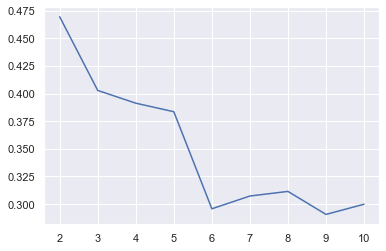

In [29]:
# silhouette_score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

***Observation*** <br> *- From above plot we can notice 2 things.<br> Firstly, The graph is going down wards very drastrically from point 2 to 3. Also this change can been seen from 5 to 6 as well. <br>Secondly, after k values of 6, the graph is changing very dramitically in zig-zag form. <br><br> - From above observations and noticing the behavior of `silhoutte_score` we can choose cluster values as either k=3 or k=6, But choosing so many clusters is never a good idea, So we will go with `k=3` clusters. But we cannot relay with it..we have to observer the behavior of `Elbo-Curve/SSD` as well.*

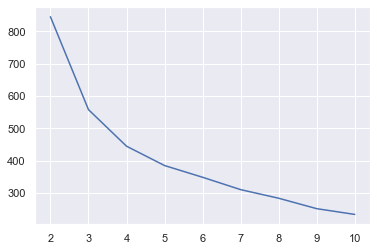

In [30]:
# elbo-curve/SSD

ssd=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    ssd.append([k,kmeans.inertia_])

plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

***Observation*** <br>*- From above `elbo-curve` we can see that 3 clusters are getting form. wo we will go with* ***`k=3`.***

<br>***KMeans Cluster Building with K=3***

In [31]:
# Clustering with k=3 and fitting to dataframe kmeans.

kmeans = KMeans(n_clusters=3, random_state=50).fit(df_scaled)

In [32]:
# creating label dataframes

kmeans_label = pd.DataFrame(kmeans.labels_,columns=['label'])
kmeans_label.head()

,label
0,1
1,2
2,2
3,1
4,2


In [33]:
# getting unique counts of kmeans_label

kmeans_label['label'].unique()

array([1, 2, 0], dtype=int64)

In [34]:
# Concating the orginal df dataframe with kmeans_label to assign each row a label.

df_kmeans = pd.concat([df,kmeans_label],axis=1)
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [35]:
# Getting value counts for each label

df_kmeans.label.value_counts()

2    90
1    48
0    29
Name: label, dtype: int64

Text(0.5, 1.0, 'gdpp vs. income')

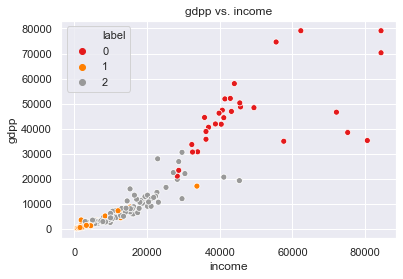

In [36]:
# gdpp vs income Scatter Plot 

sns.scatterplot(x='income', y='gdpp', hue='label', data=df_kmeans, palette='Set1')
plt.title('gdpp vs. income')

Text(0.5, 1.0, 'gdpp vs child_mort')

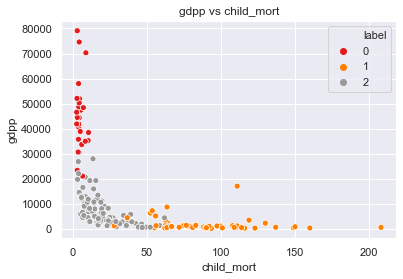

In [37]:
# gdpp vs child_mort Scatter plot

sns.scatterplot(x='child_mort', y='gdpp', hue='label', data=df_kmeans, palette='Set1')
plt.title('gdpp vs child_mort')

Text(0.5, 1.0, 'child_mort vs. income')

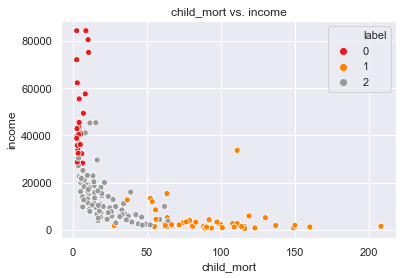

In [38]:
# child_mort vs income scatter plot

sns.scatterplot(x='child_mort', y='income', hue='label', data=df_kmeans, palette='Set1')
plt.title('child_mort vs. income')

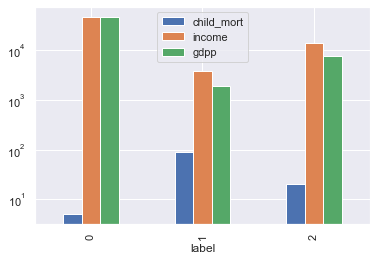

In [39]:
# Cluster Profiling

df_kmeans[['child_mort','income','gdpp','label']].groupby('label').mean().plot(kind='bar')
plt.yscale('log')

### **Profiling clusters using `gdpp, child_mort and income`**

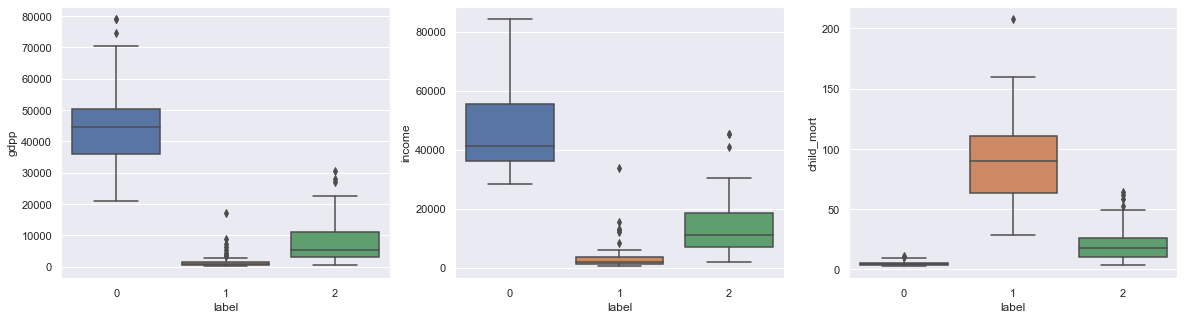

In [40]:
# Profiling Kmeans cluster

profile = ['gdpp','income','child_mort']

plt.figure(figsize = (20, 5))

for i in enumerate(profile):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='label', y=i[1], data=df_kmeans)

## **Obesrvation**
<br> - ***`gdpp vs income` Scatter plot:*** *From this plot we can see that we got the 3 clusters with* 
<br>***Cluster 0 : `high gdpp and high income`*** 
<br>***Cluster 1 : `low gdpp and low income`***
<br>***Cluster 2 : `moderate gdpp and moderate income`***  
*This cluster shape is bascially in linear form.*

<br> - ***`gdpp vs child_mort` Scatter plot:*** *Here we can see we have 3 clusters formed with*
<br>***Cluster 0: `high gdpp and low child_mort`***
<br>***Cluster 1: `low gdpp and high child_mort`***
<br>***Cluster 2: `low gdpp and low child_mort`***

<br> - ***`child_mort vs income` Scatter plot:*** *Here we can see we have 3 clusters formed with*
<br>***Cluster 0: `high income and low child_mort`***
<br>***Cluster 1: `low income and high child_mort`***
<br>***Cluster 2: `low income and low child_mort`***
<br><br>

***- Bar Plot of Cluster 0,1 and 2:*** - *From above barplot we can see the behavior of all 3 clusters*
<br>***Cluster 0: `high gdp, high income and low child_mort`***
<br>***Cluster 1: `low gdp, low income and high child_mort`***
<br>***Cluster 2: `moderate gdpp, moderate income and moderate child_mort`***
<br><br>

***- Box Plot of Cluster 0,1 and 2:*** *From above boxplot we can observe that -*
<br>***Cluster 0: `high gdp, high income and low child_mort`***
<br>***Cluster 1: `low gdp, low income and high child_mort`***
<br>***Cluster 2: `moderate gdpp, moderate income and moderate child_mort`***



## **Result**
*From above observations we can give clusters below titles:-*
- ***Cluster 0 : Developed Countries.***
- ***Cluster 1 : Undeveloped Countries.***
- ***Cluster 2 : Developing Countries.***

## **Conclusion**
*Our main focus will be on ***Cluster 1 : Under-developed Countries.*** These countries are highly in the need of AID.*<br><br>

In [41]:
df_kmeans[df_kmeans.label == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


## **Top 5 countries selection on basis of KMeans Clustering**
*Top 5 countries selection using `KMeans Clustering` on the basis of `low gdpp, low income and high child_mort`.*

In [42]:
# here we are creating kmeans_cluster_1 dataframe for contries assigned as cluster label 1 or undeveloped contries.
# then, creating top_5_undeveloped_countries dataframe on basis of low gdpp, low income and high child_mort
# then, displaying top 5 countries.

kmeans_cluster_1 = df_kmeans[df_kmeans.label == 1]
top_5_undeveloped_countries = kmeans_cluster_1.sort_values(['gdpp']).sort_values(['child_mort'],ascending=False).sort_values('income').head(5)
top_5_undeveloped_countries.set_index(np.arange(1,6))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
1,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
2,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
3,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
4,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
5,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1


<br>

## **Clustering: Hierarchical Clustering**

In [43]:
# importing scipy libraries for linkage, dendrogram and cut_tree

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### **Single Linkage**

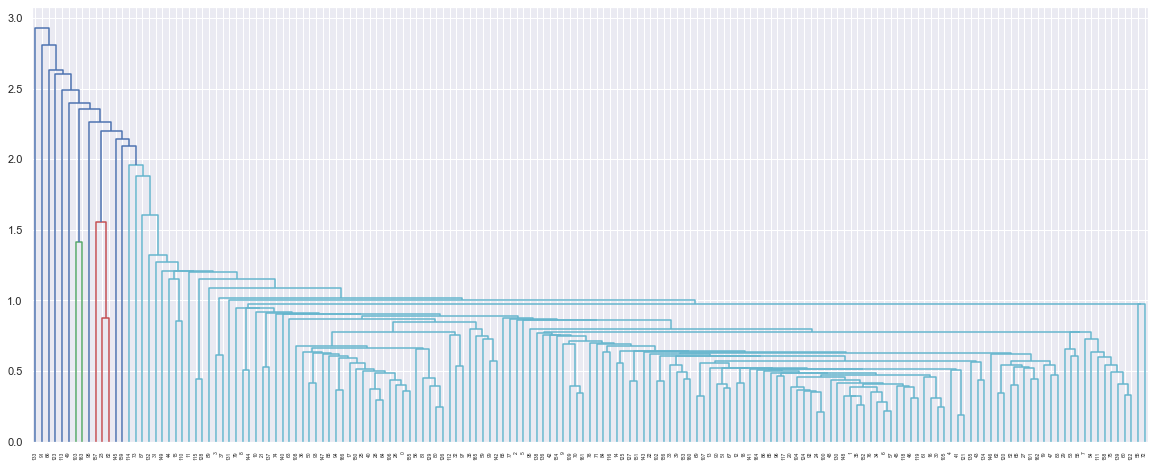

In [44]:
# Plotting single linkage

plt.figure(figsize = (20,8))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

***Observation*** <br> *- From above `single linkage` graph we can see that the clusters are formed are not very good. Its bit confusing to choose the cluster cut-off point. But we can clearly see that the `light blue cluster` are having high majority of countries and then `green and red clusters are having low majority of countries`
<br> - So, from above graph it is clear that we are not able to assign the proper cutoff value and choose cluster properly.*

#### **Complete Linkage**

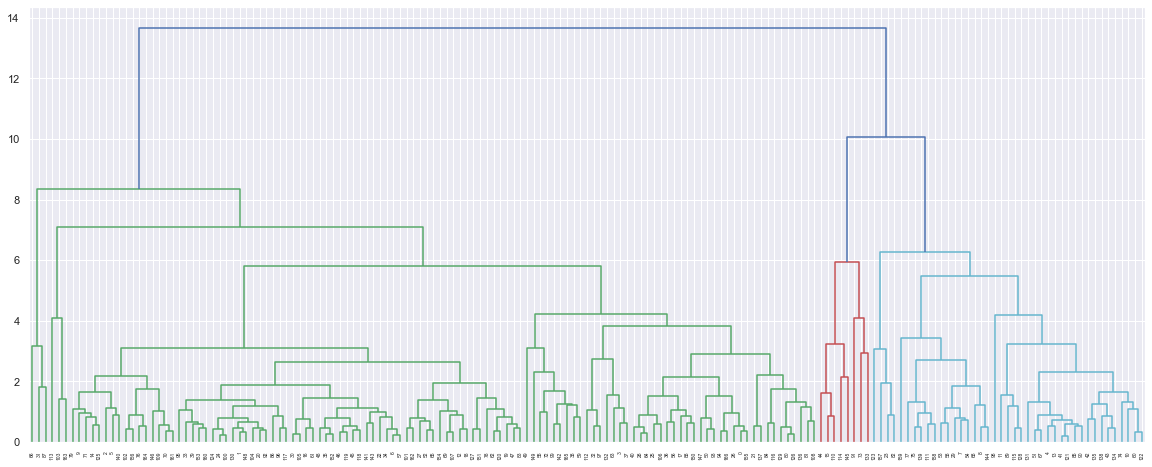

In [45]:
# Complete linkage

plt.figure(figsize = (20,8))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

***Observation***
<br> *- From above `Complete Linkage` graph we can see that at `range 10` the clusters are getting divided into 3 clusters - `green`, `red` and `sea blue`.*
<br> *- `green` cluster has hight number of countries where as `red` cluster has lowest count of countries.*

In [46]:
### K=3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels = pd.DataFrame(cluster_labels, columns=['cluster_id'])
cluster_labels.head()

,cluster_id
0,0
1,0
2,0
3,0
4,1


In [47]:
# Concating df_hier and cluster_labels dataframes

df_hier = pd.concat([df,cluster_labels],axis=1)
df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [48]:
# Value counts on cluster_id

df_hier.cluster_id.value_counts()

0    118
1     41
2      8
Name: cluster_id, dtype: int64

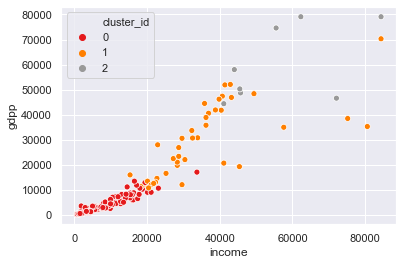

In [49]:
# gdpp vs income Scatter Plot
sns.scatterplot(x='income', y='gdpp', hue='cluster_id', data=df_hier, palette='Set1')

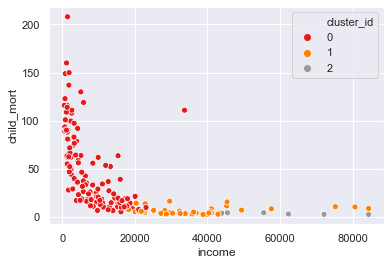

In [50]:
# child_mort vs income Scatter Plot
sns.scatterplot(x='income', y='child_mort', hue='cluster_id', data=df_hier, palette='Set1')

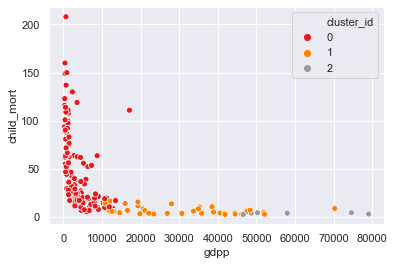

In [51]:
# child_mort vs gdpp Scatter Plot
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id', data=df_hier, palette='Set1')

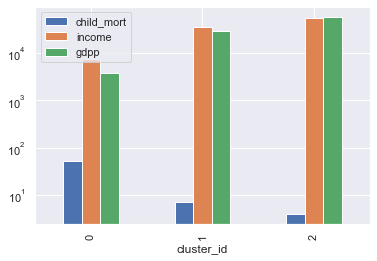

In [52]:
# Cluster Profiling

df_hier[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.yscale('log')

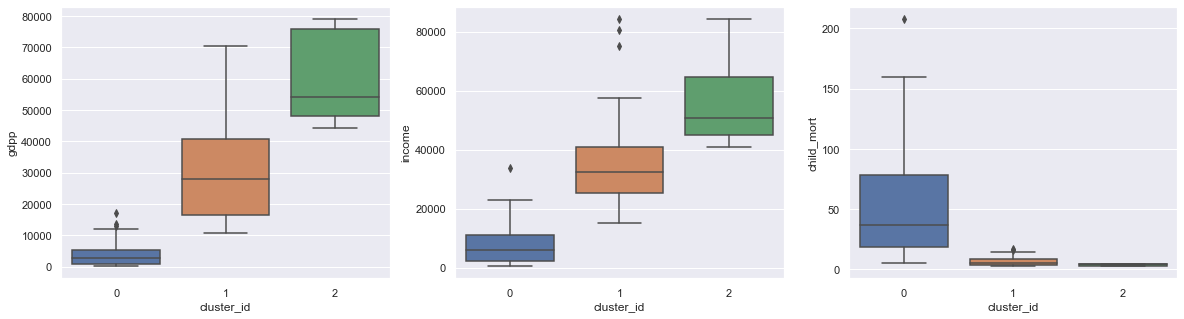

In [53]:
# Cluster Profiling using Boxplot

profile = ['gdpp','income','child_mort']

plt.figure(figsize = (20, 5))

for i in enumerate(profile):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='cluster_id', y=i[1], data=df_hier)

### **Observation**
***Scatter Plots***: *From the above scatter plots we can see that the Hierarchical clusters are not so correctly distributed and discrpitive.*
<br>***- Cluster 0:*** *This cluster has high count of countries i.e 118. We can also see the cluster is not so discriptive as the points are falling between low to medium gdpp and income which means that both type of countries which is having low gdpp and income rate & medium gdpp and income rate.*
<br>***- Cluster 1:*** *This cluster is also not so much discriptive as few points are falling on high gdpp and child_mort rates and max points are on medium values of the same.*
<br>***- Cluster 2:*** *Only 8 points are falling into this cluster*

***Bar Plot***: *From above bar plot we can see that `cluster 1` and `cluster 2` is almost identical and similar. `Cluster 0` is not much differ from rest two clusters in terms of `gdpp` and `income rate`. `child_mort` somehow is considrable for cluster 0.*

***Box Plot***:
<br> *- **Cluster 0** : `low gdpp`,`low income`,`high child_mort`. In this cluster we can see the `max value` of `gdpp` is `~14k`, `income` is `~22k`, `child_mort` is `~160`.*
<br>*- **Cluster 1** : `medium gdpp`,`medium income`,`lowest child_mort`. In this cluster we can see that the `lowest values` are of `gdpp` and `income` is falling below than the values in `Cluster 0`. And **what shocking thing is that the maximum value of `child mort` is falling in lowest quantile of the cluster 0**. This is what not so good.*
<br> **Cluster 2:** : *We are not intrested in this cluster as these countries are developed countries. So not explaining so much about this cluster as it is self explainatory by plots.*

### **Conclusion**
***Cluster 0: Having low-medium values of gdpp,income and high child_mort.***
<br>***Cluster 1: Having medium-high values of gdpp,income and lowest child_mort.***
<br>***Cluster 2: Having high values of gdpp,income and lowest child_mort.***

### **Result**
- *Hierarchical Clustering is not so much discriptive and not properly divided into the clusters. Still if we want to choose one cluster among these we will go with the cluster 0 as this cluster has highest child_mort and low gdpp and income rate*

## **Top 5 countries selection on basis of Hierarchical Clustering**
*Top 5 countries selection using `Hierarchical Clustering` on the basis of `low gdpp, low income and high child_mort`.*

In [54]:
# top 5 countries using hierarchical clustering
# Storing cluster_id == 0 to hier_cluster_0 dataframe
# and filtering top 5 countries in hier_top_5_countries dataframe on basis of gdpp child_mort and income

hier_cluster_0 = df_hier[df_hier['cluster_id']==0]
hier_top_5_countries = hier_cluster_0.sort_values('gdpp').sort_values('child_mort',ascending=False).sort_values('income').head(5)
hier_top_5_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0


# **Cluster Analysis of KMeans**
*Anaylsis of Top 5 formed using KMeans Cluster.*

In [55]:
# displaying top 5 countries of K Means.
top_5_undeveloped_countries.set_index(np.arange(1,len(top_5_undeveloped_countries)+1))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
1,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
2,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
3,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
4,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
5,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1


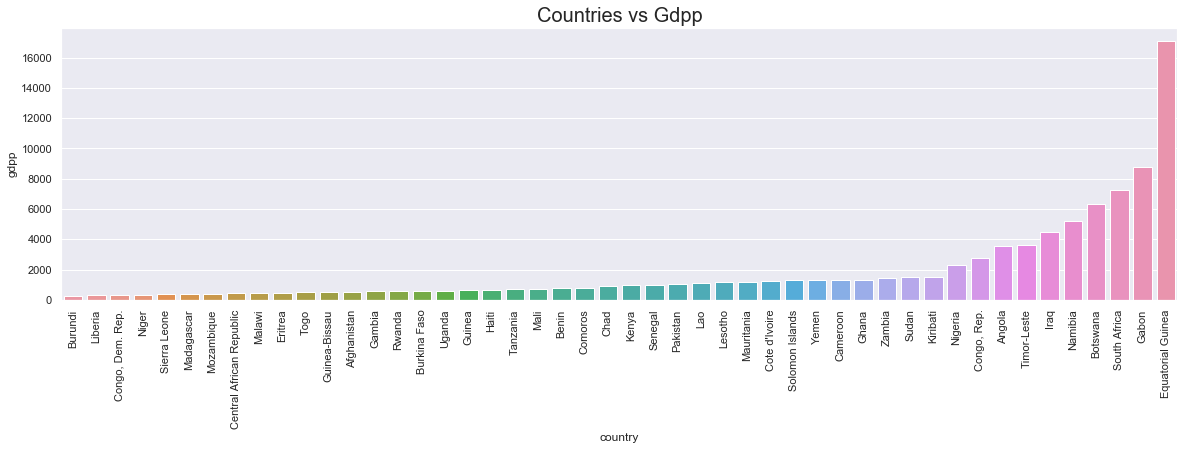

In [56]:
# Plot of Under-Developed countries w.r.t gdpp (low to high)

plt.figure(figsize = (20,5))

g = sns.barplot(x='country',y='gdpp',data=kmeans_cluster_1.sort_values('gdpp'))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Countries vs Gdpp',size=20)
plt.show()

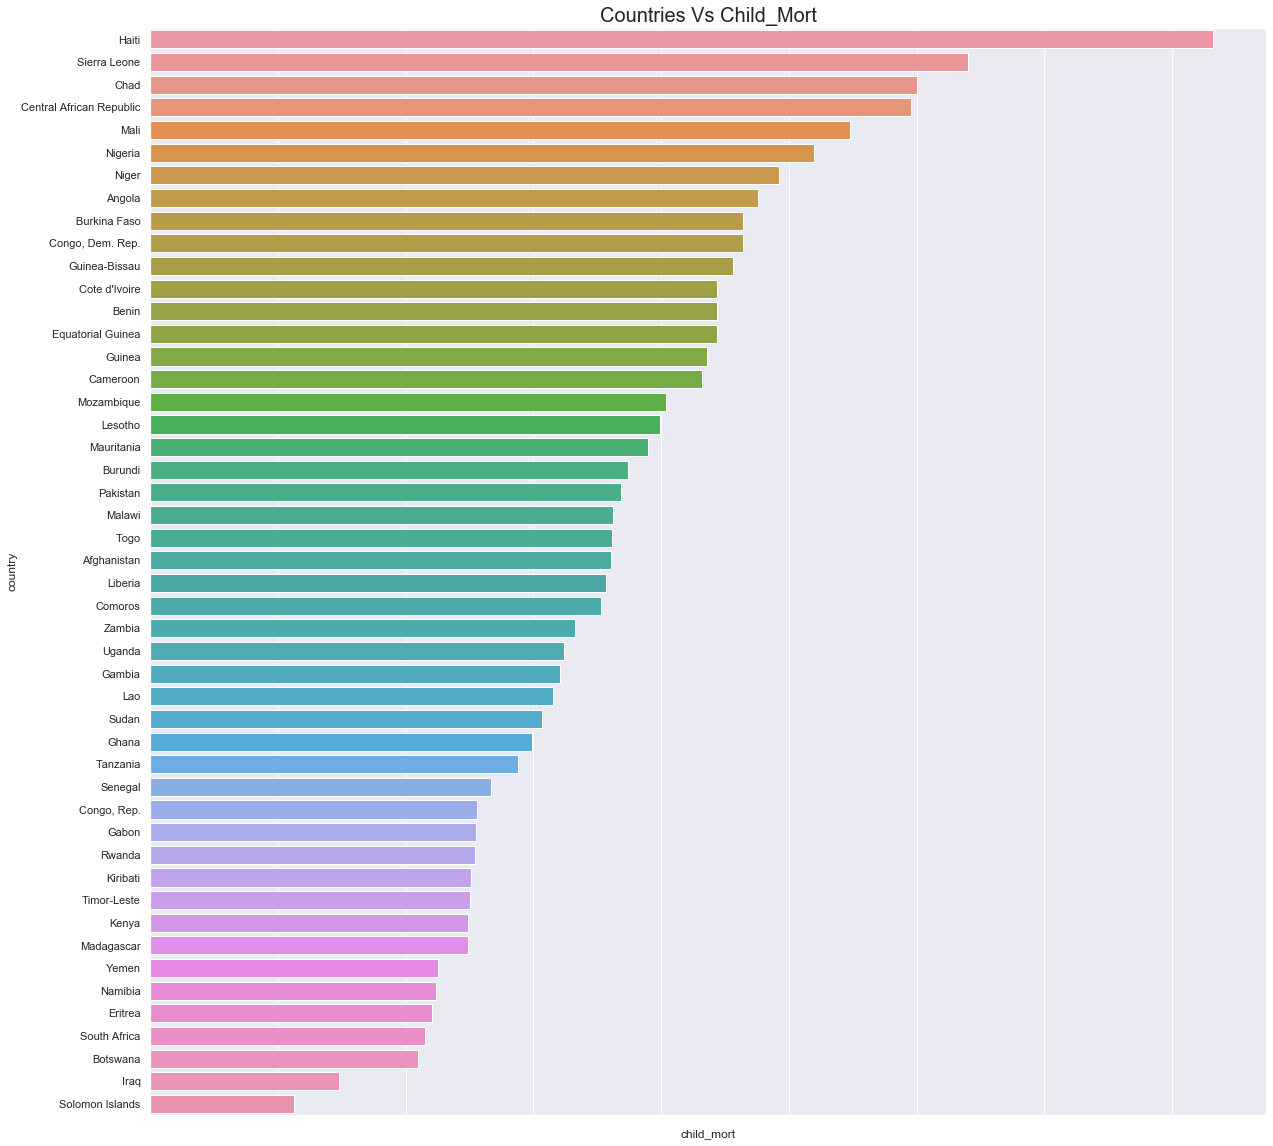

In [57]:
# Plot of Under-developed countries w.r.t child_mort (high to low)

plt.figure(figsize = (20,20))

g = sns.barplot(y='country',x='child_mort',data=kmeans_cluster_1.sort_values('child_mort',ascending=False))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Countries Vs Child_Mort',size=20)
plt.show()

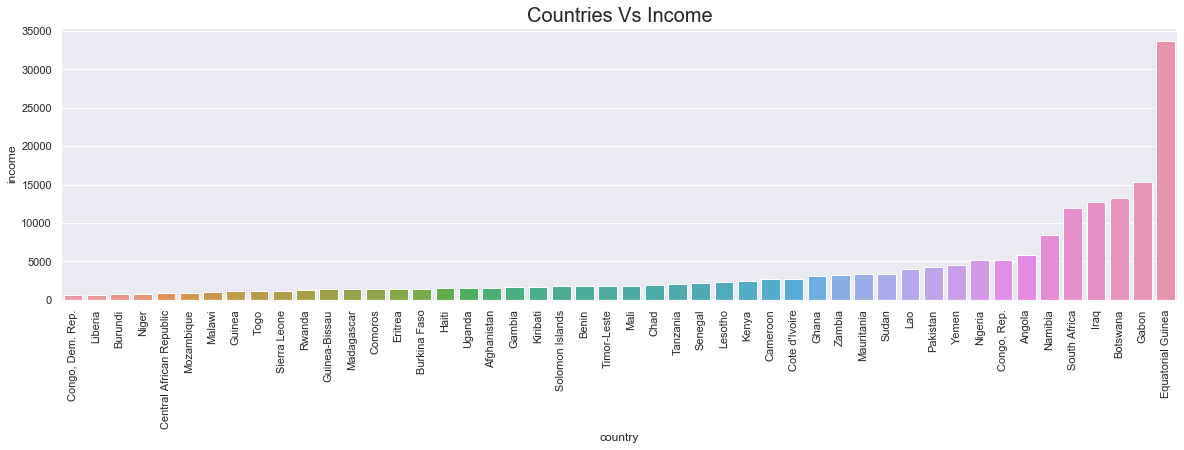

In [58]:
# Plot of countries w.r.t income (low to high)

plt.figure(figsize = (20,5))

g = sns.barplot(x='country',y='income',data=kmeans_cluster_1.sort_values('income'))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Countries Vs Income',size=20)
plt.show()

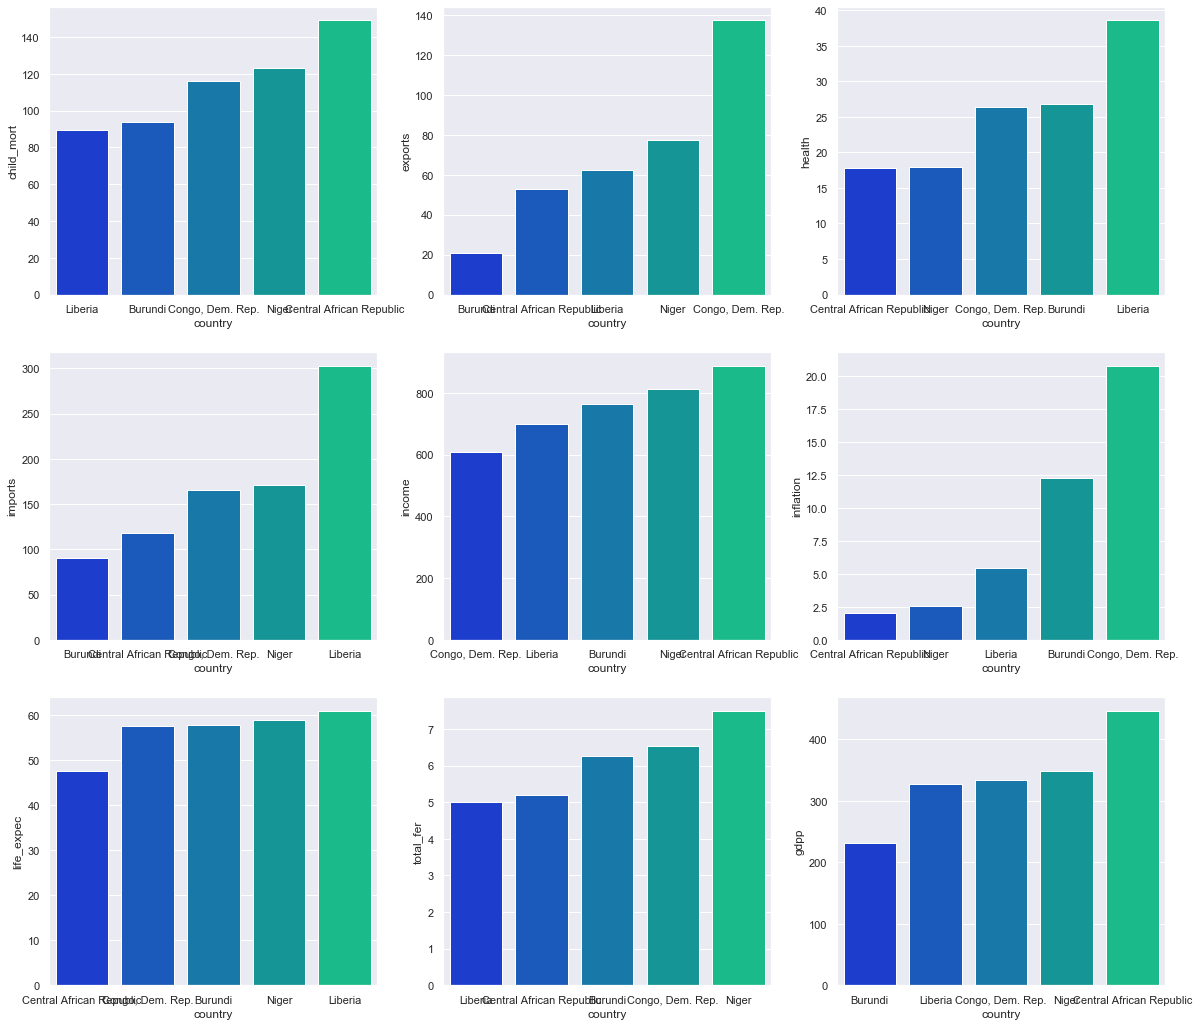

In [59]:
# Feature wise observation of top 5 countries (low to high)

col = top_5_undeveloped_countries.columns.drop(['country','label'])
col.shape

plt.figure(figsize = (20,18))
for i in enumerate(col):
    plt.subplot(3,3,i[0]+1)
    g = sns.barplot(x='country',y=i[1], data=top_5_undeveloped_countries.sort_values(i[1]),palette='winter')
    

Above graph is statistics of top 5 under-developed countries w.r.t all features.

# **Final Conclusion and Result**

### **Top 5 Countries**
- Congo, Dem. Rep.
- Liberia
- Burundi
- Niger
- Central African Republic

Text(0.5, 1.0, 'gdpp vs. income vs. child_mort of Top 5 Countries')

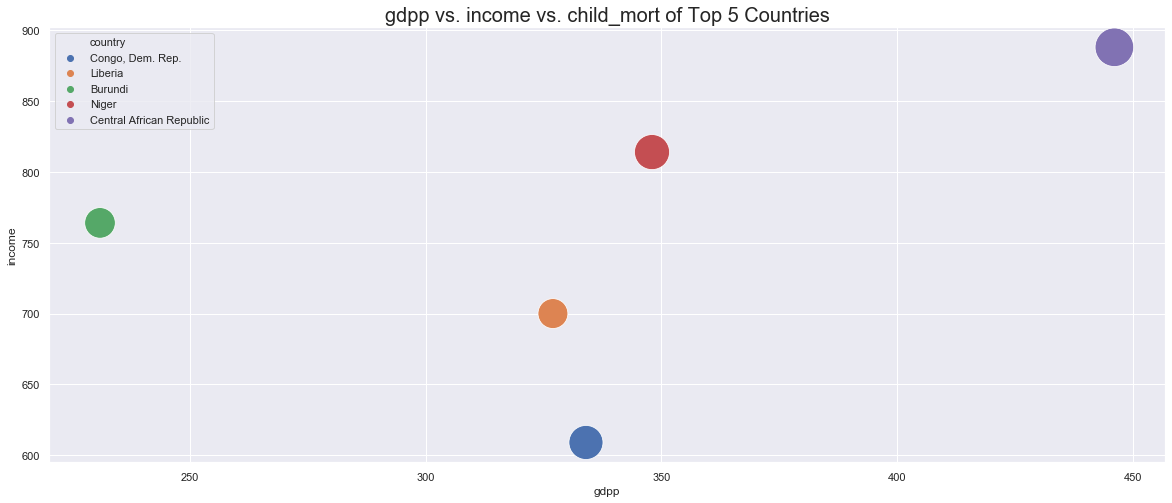

In [60]:
# Final Conclusion Graph.
# x-axis denotes income
# y-axis denotes gdpp
# circle size denotes child_mort
# circle color denotes country


plt.figure(figsize = (20,8))
sns.scatterplot(x='gdpp',y='income',hue='country',s=top_5_undeveloped_countries['child_mort']*10,data=top_5_undeveloped_countries)
plt.title('gdpp vs. income vs. child_mort of Top 5 Countries',size=20)

***Obesrvation*** : *In above graph you can see the overall final status of the top 5 coubtries who are in need of AID. 
<br> - `x-axis` shows `income`
<br> - `y-axis` shows `gdpp`
<br> - `circles` shows `countries`
<br> - `circles-size` shows `child_mort`. i.e the bigger the circle size, the high is child_mort*


# Thank You